In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
import imutils
import math

In [12]:
image = cv2.imread("Samples/Sample9.png")

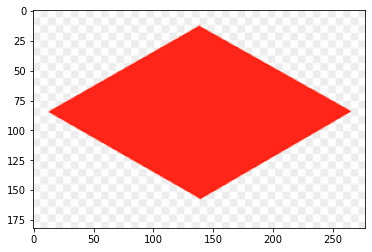

In [13]:
plt.imshow(image)
plt.show()

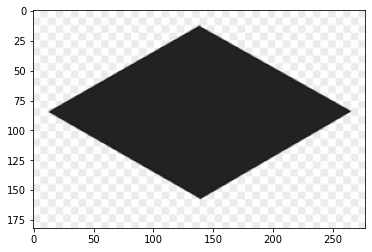

In [14]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap= 'gray')
plt.show()

In [15]:
thresh = cv2.threshold(gray,240, 255, cv2.THRESH_BINARY)[1]
edges = cv2.Canny(thresh,100,200)

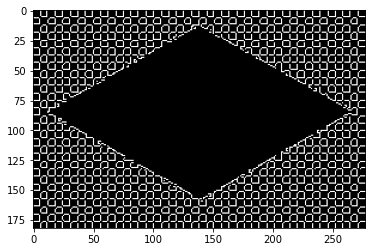

In [16]:
plt.imshow(edges,cmap= 'gray')
plt.show()

In [7]:
#cnts = cv2.drawContours(thresh,cnts,-1, (0,,0), 3)



In [8]:
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

In [9]:
print(len(contours))
for c in contours :
    print("contours starts at")
    print(c)
    print("ends")

2
contours starts at
[[[  0   0]]

 [[  0 224]]

 [[224 224]]

 [[224   0]]]
ends
contours starts at
[[[104  24]]

 [[105  23]]

 [[106  23]]

 [[110  27]]

 [[110  28]]

 [[115  33]]

 [[115  34]]

 [[120  39]]

 [[120  40]]

 [[124  44]]

 [[124  45]]

 [[129  50]]

 [[129  51]]

 [[134  56]]

 [[134  57]]

 [[139  62]]

 [[139  63]]

 [[143  67]]

 [[143  68]]

 [[148  73]]

 [[148  74]]

 [[153  79]]

 [[153  80]]

 [[158  85]]

 [[158  86]]

 [[162  90]]

 [[162  91]]

 [[167  96]]

 [[167  97]]

 [[172 102]]

 [[172 103]]

 [[176 107]]

 [[176 108]]

 [[181 113]]

 [[181 114]]

 [[184 117]]

 [[184 118]]

 [[180 122]]

 [[180 123]]

 [[175 128]]

 [[175 129]]

 [[171 133]]

 [[171 134]]

 [[166 139]]

 [[166 140]]

 [[161 145]]

 [[161 146]]

 [[156 151]]

 [[156 152]]

 [[152 156]]

 [[152 157]]

 [[147 162]]

 [[147 163]]

 [[143 167]]

 [[143 168]]

 [[138 173]]

 [[138 174]]

 [[134 178]]

 [[134 179]]

 [[128 185]]

 [[128 186]]

 [[123 191]]

 [[123 192]]

 [[119 196]]

 [[

In [10]:
#image = cv2.rectangle(image,(0,0), end, color, thickness) 

aspect ratio1.0
[[  0   0]
 [  0 224]
 [224 224]
 [224   0]]
[[  0.   0.]
 [224.   0.]
 [224. 224.]
 [  0. 224.]]
above rect
316.7838379715733
316.7838379715733
square
jhvjvjvjvjh


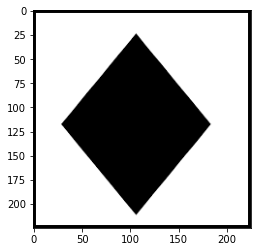

aspect ratio0.8263157894736842
[[105  23]
 [184 117]
 [106 212]
 [ 28 118]]
parallelogram or trapezium


In [11]:
i=0
for c in contours:
    perimeter = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,0.01*perimeter,True)
    if(len(approx)== 4):
        (x, y, w, h) = cv2.boundingRect(approx)
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
        ar = w/float(h)
        print(f"aspect ratio{ar}")
        if(ar >=0.95 and ar <=1.05):
            pts = approx.reshape(4, 2)
            print(pts)
            rect = np.zeros((4, 2), dtype = "float32")
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
            s = pts.sum(axis = 1)
            rect[0] = pts[np.argmin(s)]
            rect[2] = pts[np.argmax(s)]
    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
            diff = np.diff(pts, axis = 1)
            rect[1] = pts[np.argmin(diff)]
            rect[3] = pts[np.argmax(diff)]
    # return the ordered coordinates
            print(rect)
            print("above rect")
            x1= rect[0][0]
            y1= rect[0][1]
            x2= rect[1][0]
            y2= rect[1][1]
            x3= rect[2][0]
            y3= rect[2][1]
            x4= rect[3][0]
            y4= rect[3][1]
            dist1 = math.sqrt((x3 - x1)**2 + (y3 - y1)**2)
            dist2 = math.sqrt((x4 - x2)**2 + (y4 - y2)**2)
            print(dist1)
            print(dist2)
            
            if((dist1 -dist2)//dist1)<=0.2:
                    print("square")
            else:
                    print("rhombus")
            print("jhvjvjvjvjh")
            cv2.drawContours(image,contours,i, (0,0,0), 3)
            i+=1
            plt.imshow(image,cmap= 'gray')
            plt.show()
        else:
            pts = approx.reshape(4, 2)
            print(pts)
            print("parallelogram or trapezium")

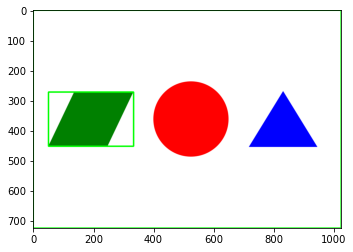

In [179]:
plt.imshow(image,cmap= 'gray')
plt.show()

In [19]:
if(10):
    print("255")
elif(0):
    print(" 0")
else:
    print("dddddd")

255
